# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rafi Gumilang
- **Email:** rafigumilang8@gmail.com
- **ID Dicoding:** rafi_gumilang182

## Menentukan Pertanyaan Bisnis

1. When did the bike sharing rentals reach the highest number in a day?
2. What is the bike sharing rental count for each month?
3. How is the bike sharing rental distribution across different weather conditions?


## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar


## Data Wrangling
###Divided into 3 stages, namely:
1. Gathering Data (Data Collection)
2. Assessing Data (Data Assessment)
3. Cleaning Data (Data Cleaning)

### Gathering Data

In [ ]:
# Membaca file data dan menyimpannya dalam variabel DataFrame
hour_df = pd.read_csv('/content/hour.csv')
# Mencetak lima baris pertama dari DataFrame 'hour'
print("The First Five Rows of the Hour DataFrame:")
hour_df.head()

The First Five Rows of the Hour DataFrame:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# Membaca file data dan menyimpannya dalam variabel DataFrame
day_df = pd.read_csv('/content/day.csv')
# Mencetak lima baris pertama dari DataFrame 'day'
print("The First Five Rows of the Hour DataFrame:")
day_df.head()

The First Five Rows of the Hour DataFrame:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [ ]:
print("Hourly Data Information:")
hour_df.info()
hour_df.isna().sum()

Hourly Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Hourly Data Information:")
day_df.info()
day_df.isna().sum()

Hourly Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Number of duplications: ", hour_df.duplicated().sum())

Number of duplications:  0


In [ ]:
print("Number of duplications: ", day_df.duplicated().sum())

Number of duplications:  0


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

  hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

  day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

In [ ]:
hour_df.describe(include="all")


<ipython-input-80-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [ ]:
day_df.describe(include="all")

<ipython-input-81-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


<ipython-input-82-e05b9433b693>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hour_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


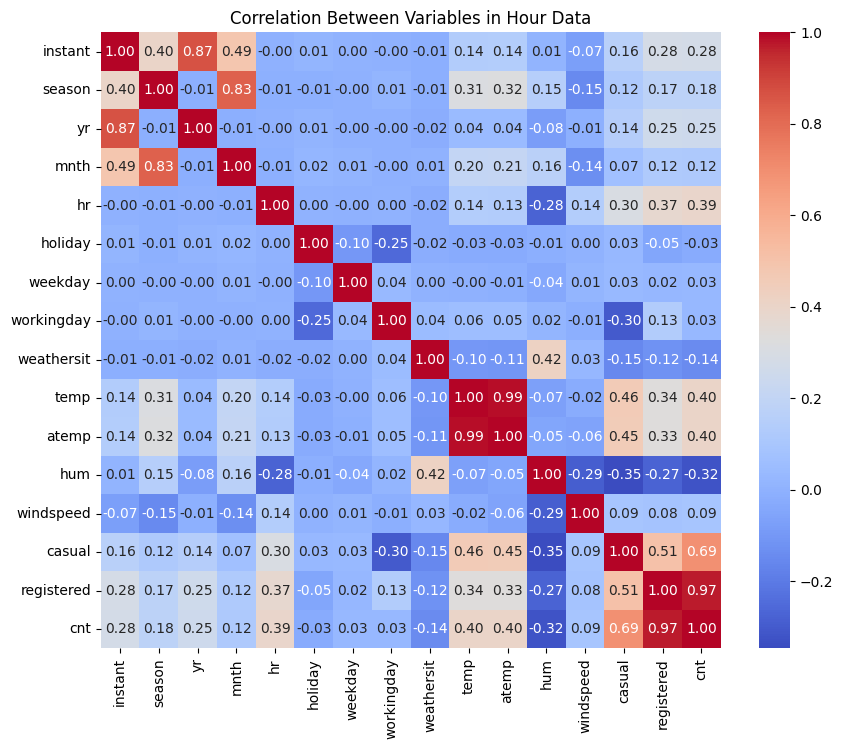

In [ ]:
# Menampilkan korelasi antara variabel pada data hour
plt.figure(figsize=(10, 8))
sns.heatmap(hour_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Variables in Hour Data')
plt.show()

<ipython-input-83-b680cb926d2b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(day_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


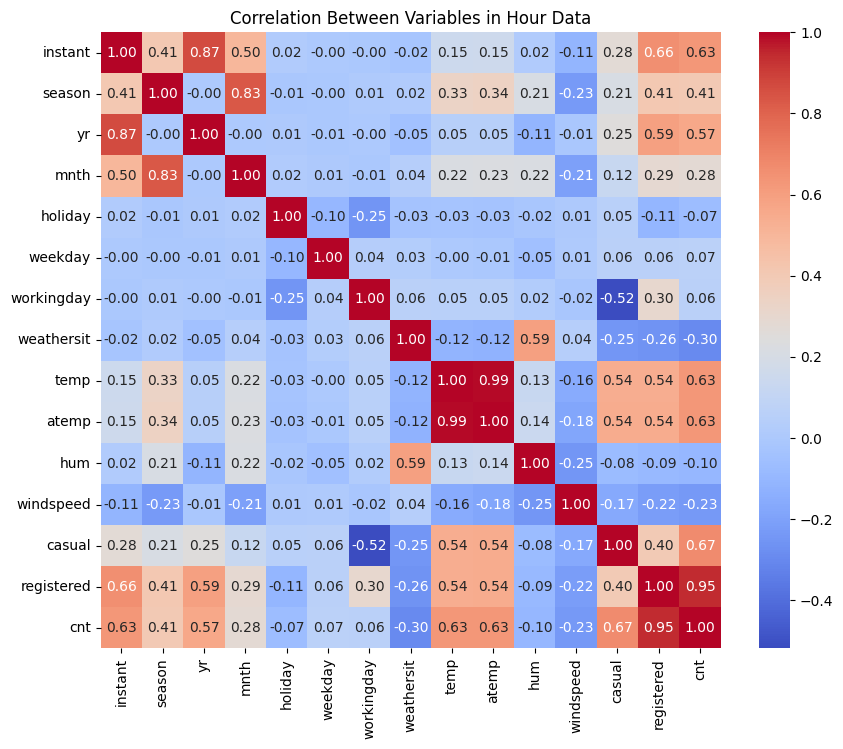

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(day_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Variables in Hour Data')
plt.show()

In [ ]:
# Mengonversi kolom 'dteday' ke tipe datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Menambahkan kolom bulan (dari kolom 'dteday')
hour_df['month'] = hour_df['dteday'].dt.strftime('%Y-%m')

# Membuat dataframe untuk jumlah peminjaman sepeda dan total pendapatan bulanan
monthly_bike_rentals_df = hour_df.groupby('month').agg({
    'instant': 'count',  # Menghitung jumlah peminjaman sepeda
    'cnt': 'sum'  # Menjumlahkan total peminjaman sepeda
}).reset_index()

# Menampilkan hasil
print(monthly_bike_rentals_df.head())


     month  instant     cnt
0  2011-01      688   38189
1  2011-02      649   48215
2  2011-03      730   64045
3  2011-04      719   94870
4  2011-05      744  135821


In [ ]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah peminjaman sepeda
sum_order_items_df = hour_df.groupby("season")['instant'].count().reset_index()
sum_order_items_df.rename(columns={'instant': 'total_orders'}, inplace=True)

# Mengurutkan berdasarkan jumlah peminjaman terbanyak
sum_order_items_df = sum_order_items_df.sort_values(by='total_orders', ascending=False)

# Mengubah kode musim menjadi nama musim
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
sum_order_items_df['season'] = sum_order_items_df['season'].map(season_mapping)

# Menampilkan musim dengan jumlah peminjaman terbanyak
print(sum_order_items_df.head(15))


   season  total_orders
2    Fall          4496
1  Summer          4409
0  Spring          4242
3  Winter          4232


In [ ]:
# Dictionary untuk pemetaan angka ke nama hari dalam Bahasa Indonesia
nama_hari = {
    0: "Senin",
    1: "Selasa",
    2: "Rabu",
    3: "Kamis",
    4: "Jumat",
    5: "Sabtu",
    6: "Minggu"
}

# Mengelompokkan berdasarkan kolom weekday dan menghitung jumlah peminjaman Perhari (cnt)
weekday_grouped = hour_df.groupby("weekday")["cnt"].count()

# Mengubah indeks (angka) menjadi nama hari
weekday_grouped.index = weekday_grouped.index.map(nama_hari)

print("Loan amount based on weekday:")
print(weekday_grouped)


Loan amount based on weekday:
weekday
Senin     2502
Selasa    2479
Rabu      2453
Kamis     2475
Jumat     2471
Sabtu     2487
Minggu    2512
Name: cnt, dtype: int64


In [ ]:
# Mengelompokkan data berdasarkan kondisi cuaca dan menghitung jumlah peminjaman sepeda
weather_orders_df = hour_df.groupby("weathersit")['instant'].count().reset_index()
weather_orders_df.rename(columns={'instant': 'total_orders'}, inplace=True)

# Mengurutkan berdasarkan jumlah peminjaman terbanyak
weather_orders_df = weather_orders_df.sort_values(by='total_orders', ascending=False)

# Mengubah kode kondisi cuaca menjadi nama kondisi cuaca
weather_mapping = {
    1: 'Bright',
    2: 'Mist',
    3: 'Drizzle',
    4: 'Heavy Rain'
}
weather_orders_df['weathersit'] = weather_orders_df['weathersit'].map(weather_mapping)

# Menampilkan 15 kondisi cuaca dengan jumlah peminjaman terbanyak
print(weather_orders_df.head(15))


   weathersit  total_orders
0      Bright         11413
1        Mist          4544
2     Drizzle          1419
3  Heavy Rain             3


### Explore ...

In [ ]:
# Misalnya, Recency dihitung sebagai perbedaan antara tanggal terakhir dalam dataset dengan tanggal pengamatan terakhir dalam dataset
# Frequency dihitung sebagai rata-rata frekuensi peminjaman per hari
# Monetary dihitung sebagai total peminjaman per hari
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
recency = (hour_df['dteday'].max() - hour_df['dteday']).dt.days
frequency = hour_df.groupby('dteday').size().mean()
monetary = hour_df.groupby('dteday')['cnt'].sum()

# Conclusion
# Menyajikan kesimpulan dari analisis yang telah dilakukan
print("RFM Analysis:")
print("Recency:", recency)
print("Frequency:", frequency)
print("Monetary:", monetary)
print("\nClustering Results:")
print(hour_df['cluster'].value_counts())






RFM Analysis:
Recency: 0        730
1        730
2        730
3        730
4        730
        ... 
17374      0
17375      0
17376      0
17377      0
17378      0
Name: dteday, Length: 17379, dtype: int64
Frequency: 23.774281805745552
Monetary: dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Name: cnt, Length: 731, dtype: int64

Clustering Results:
0    6881
1    5517
2    4981
Name: cluster, dtype: int64


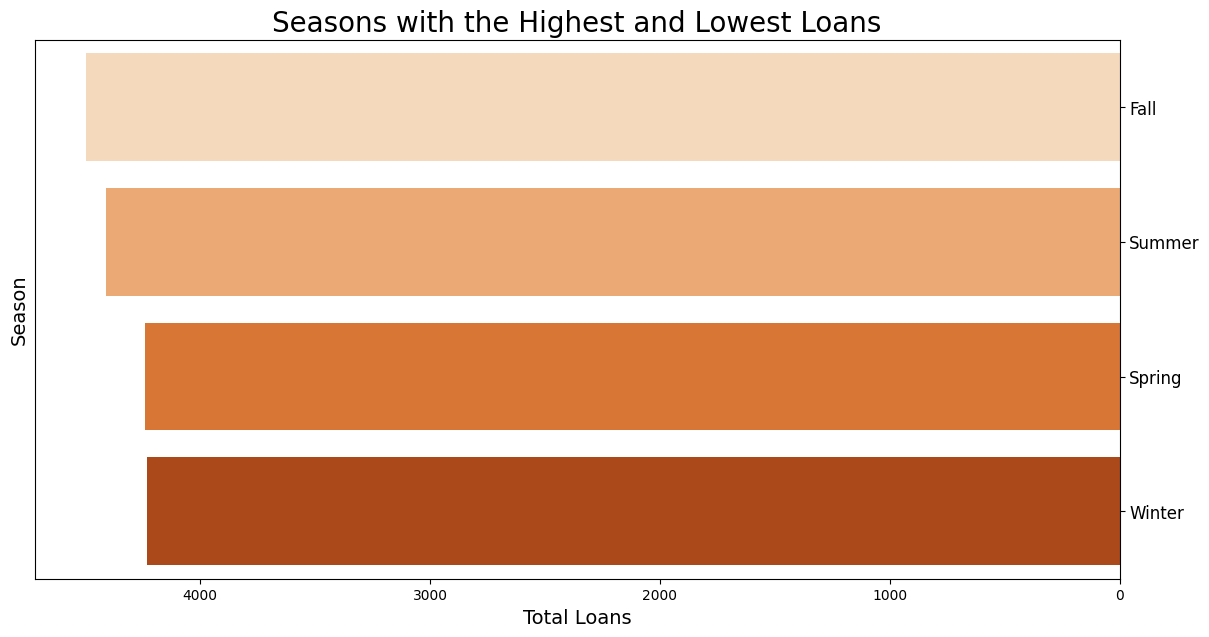

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))

# Plot musim dengan peminjaman terbanyak
sns.barplot(x="total_orders", y="season", data=sum_order_items_df.head(5), hue='season', palette='Blues', ax=ax, legend=False)
ax.tick_params(axis='y', labelsize=12)

# Plot musim dengan peminjaman terendah
sns.barplot(x="total_orders", y="season", data=sum_order_items_df.sort_values(by="total_orders", ascending=True).head(5), hue='season', palette='Oranges_r', ax=ax, legend=False)
ax.invert_xaxis()
ax.yaxis.tick_right()
ax.tick_params(axis='y', labelsize=12)

# Menambahkan judul dan label sumbu
plt.title("Seasons with the Highest and Lowest Loans", fontsize=20)
plt.xlabel("Total Loans", fontsize=14)
plt.ylabel("Season", fontsize=14)

plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1: When did the bike sharing rentals reach the highest number in a day?


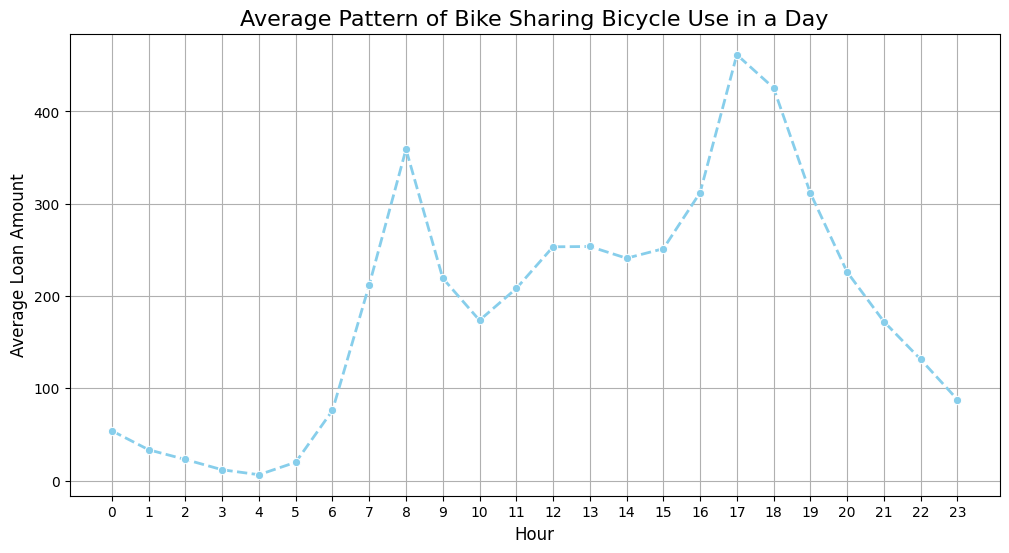

In [ ]:
# Menghitung rata-rata jumlah peminjaman sepeda per jam
hourly_average = hour_df.groupby('hr')['cnt'].mean().reset_index()

# Visualisasi pola penggunaan sepeda dalam sehari dengan variasi yang menarik
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_average, x='hr', y='cnt', marker='o', color='skyblue', linewidth=2, linestyle='--', dashes=(5, 2))
plt.title('Average Pattern of Bike Sharing Bicycle Use in a Day', fontsize=16)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Average Loan Amount', fontsize=12)
plt.xticks(np.arange(24), fontsize=10)  # Menampilkan semua jam dalam sumbu x
plt.yticks(fontsize=10)
plt.grid(True)  # Menambahkan grid untuk memudahkan pembacaan

plt.show()


### Pertanyaan 2:  What is the bike sharing rental count for each month?

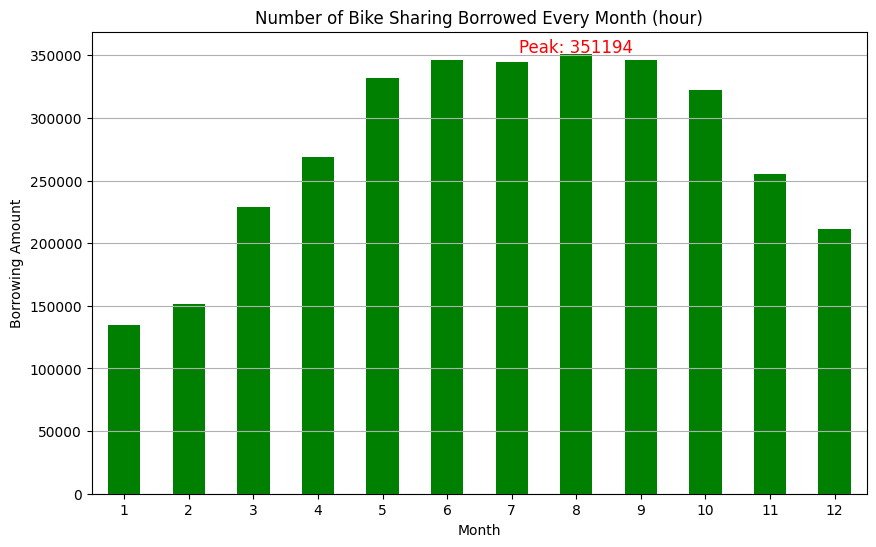

In [ ]:
# Menghitung jumlah peminjaman sepeda setiap bulan file hour
monthly_rentals = day_df.groupby('mnth')['cnt'].sum()

# Visualisasi jumlah peminjaman bike sharing setiap bulan
plt.figure(figsize=(10, 6))
monthly_rentals.plot(kind='bar', color='Green')
plt.title('Number of Bike Sharing Borrowed Every Month (hour)')
plt.xlabel('Month')
plt.ylabel('Borrowing Amount')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Menambahkan marker untuk puncak tertinggi
max_month = monthly_rentals.idxmax()
max_rentals = monthly_rentals.max()
plt.text(max_month - 1, max_rentals + 1000, f'Peak: {max_rentals}', ha='center', color='red', fontsize=12)

# Mengatur skala sumbu y agar lebih mudah dibaca
plt.ticklabel_format(style='plain', axis='y')

plt.show()

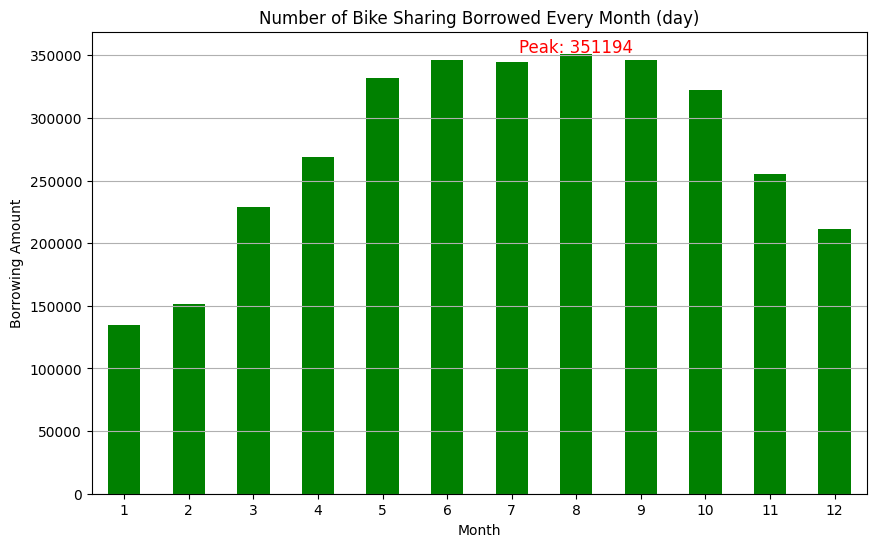

In [ ]:
# Menghitung jumlah peminjaman sepeda setiap bulan file day
monthly_rentals = day_df.groupby('mnth')['cnt'].sum()

# Visualisasi jumlah peminjaman bike sharing setiap bulan
plt.figure(figsize=(10, 6))
monthly_rentals.plot(kind='bar', color='Green')
plt.title('Number of Bike Sharing Borrowed Every Month (day)')
plt.xlabel('Month')
plt.ylabel('Borrowing Amount')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Menambahkan marker untuk puncak tertinggi
max_month = monthly_rentals.idxmax()
max_rentals = monthly_rentals.max()
plt.text(max_month - 1, max_rentals + 1000, f'Peak: {max_rentals}', ha='center', color='red', fontsize=12)

# Mengatur skala sumbu y agar lebih mudah dibaca
plt.ticklabel_format(style='plain', axis='y')

plt.show()

###Pertanyaan 3: How is the bike sharing rental distribution across different weather conditions?

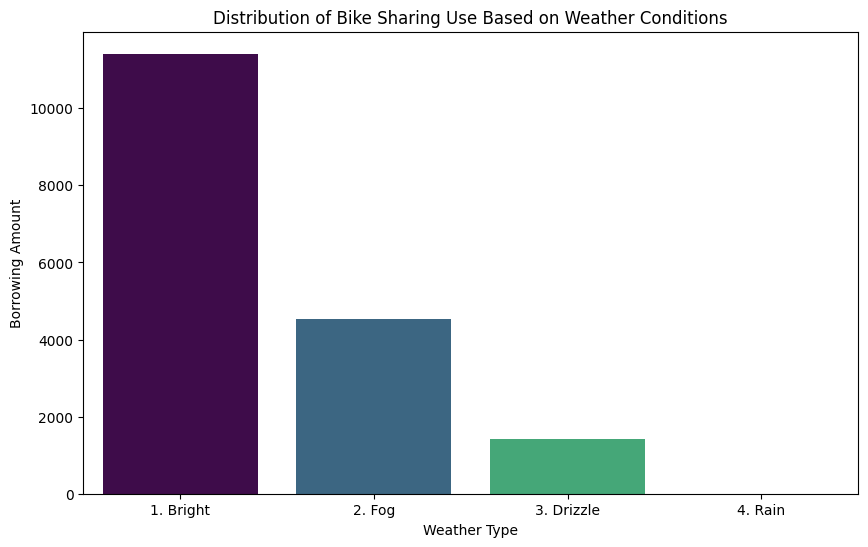

In [ ]:
# Distribusi penggunaan Bike Sharing Berdasarkan Kondisi Cuaca
plt.figure(figsize=(10, 6))
sns.countplot(data=hour_df, x='weathersit', hue='weathersit', palette='viridis', legend=False)
plt.title('Distribution of Bike Sharing Use Based on Weather Conditions')
plt.xlabel('Weather Type')
plt.ylabel('Borrowing Amount')
plt.xticks(ticks=[0, 1, 2, 3], labels=['1. Bright', '2. Fog', '3. Drizzle', '4. Rain'])
plt.show()

## Conclusion

1. From the graph obtained, it can be seen that Bike Sharing lending reaches its highest peak at 17:00 in a day, while the lowest borrowing occurs at 04:00. This shows that the pattern of sharing bicycle use varies throughout the 24 hours of the day. The peak of borrowing at 17:00 may occur due to work time so people choose to use bike sharing as a means of transportation. On the other hand, the lowest borrowing at 04:00 is caused by the lack of activity or activities at that time, such as sleeping and the few people who are outside the house at that time. Therefore, understanding this pattern can help in planning bike sharing resource management, such as bicycle stock management and customer service planning, to optimize the use of bike sharing throughout the day.







2. If the hour and day data are combined and analyzed, it can be seen that August has the highest number of bike sharing loans, reaching 702,388. This may be due to several factors such as holidays or weather that is conducive to cycling. In contrast, January has the lowest loan amounts. This can be caused by weather that is less conducive to cycling, such as winter or bad weather conditions. By knowing these patterns, bike sharing service providers can carry out more effective marketing strategies, such as targeting promotions in months with high borrowing and optimizing bicycle stock based on seasonal trends. In addition, this can also be a consideration in operational planning, such as bicycle care and maintenance, as well as resource allocation during various seasons of the year.

3. From the diagram obtained, it can be seen that weather plays an important role in the use of bike sharing services. On days with sunny weather, there is a significant spike in the use of bike sharing, while on days with rainy weather, the use of bike sharing is very little or even non-existent. This shows that most people prefer to use bike sharing services when the weather is fine, perhaps because good weather makes cycling more enjoyable and comfortable. On the other hand, when the weather is bad, such as rain, people tend to choose transportation alternatives that are more comfortable or safer than cycling. With this understanding, bike sharing service providers can use weather information to optimize their marketing and operational strategies. For example, they can target special promotions during good weather to encourage use of the service, or improve services during the rainy season by offering special discounts or incentives.

In [ ]:
# Menggabungkan kedua dataframe
all_df = pd.concat([hour_df, day_df])

# Menyimpan data ke dalam file CSV
all_df.to_csv("all_data.csv", index=False)